

Reaction at 'node 1' is 2.01 Kn.

Reaction at 'node 3' is 0.92 Kn.

Reaction at 'node 4' is 47.07 Kn.

Rotation at Node 2 = -0.006 radians and -0.32 degree.

Rotation at Node 3 = 0.003 radians and 0.185 degree.

Vertical displacement at Node 2 = 9.414 mm.

Total stiffness matrix is: 
[[ 2800000.        0.        0. -2800000.        0.        0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.        0.        0.]
 [-2800000.        0.        0.  5600000.        0.        0. -2800000.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.  2800000.        0.        0.]
 [       0.        0.        0.        0.        0.        0. 

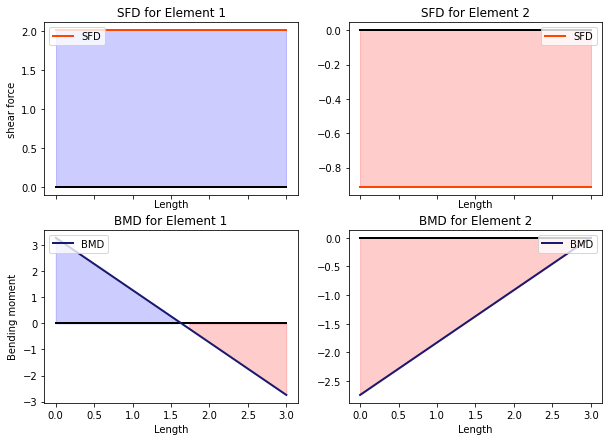

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tkinter import *

def calculate():

    E = int(entry1.get())
    I = float(entry2.get())
    l1 = int(entry3.get())
    l2 = int(entry4.get())
    p = int(entry5.get())
    k= 5000                   # KN/m

    window.destroy()

    # Calculation of reactions
    delta= p/(3*E*I/l1**3 + k)
    RB = 3/(l1+l2)**3 * (((p-k*delta)*(l1**3)/3) + (p-k*delta)*l1*l1*l2/2)
    RC = k*delta
    MA = -RB*(l1+l2)+(p-k*delta)*l1
    RA= p-RC-RB

    print(f"\nReaction at 'node 1' is {round(RA,2)} Kn.")
    print(f"\nReaction at 'node 3' is {round(RB,2)} Kn.")
    print(f"\nReaction at 'node 4' is {round(RC,2)} Kn.")

    # Element 1
    x1 = np.linspace(start=0, num=20, stop=l1)
    SF_1 = RA-x1+x1
    BM_1 = MA-RA * x1

    # Element 2
    x2 = np.linspace(start=0, num=20, stop=l2)
    SF_2 = -RB+x2-x2
    BM_2 = -(l2-x2) * RB

    # Finding deflection at C and Rotations at C and B
    theta_3 = (p-k*delta)*l1*l1/(2*E*I) - (RB*l1*l1/(2*E*I))
    theta_2 = (p-k*delta)*l1*l1/(2*E*I) - (RB*l1*l1/(2*E*I) + RB*l2*l1*l1/(E*I))
    delta_3 = 0
    delta_2 = delta

    print(f'\nRotation at Node 2 = {round(theta_2,3)} radians and {round((180 / 3.142) * theta_2, 3)} degree.')
    print(f'\nRotation at Node 3 = {round(theta_3,3)} radians and {round((180 / 3.142) * theta_3, 3)} degree.')
    print(f'\nVertical displacement at Node 2 = {round(delta_2*1000,3)} mm.')

    # Stiffness matrix
    A = 0.06

    k1 = np.array([[E * A / l1, 0, 0, -E * A / l1, 0, 0],
                   [0, 12 * E * I / l1 ** 3, 6 * E * I / l1 ** 2, 0, -12 * E * I / l1 ** 3, 6 * E * I / l1 ** 3],
                   [0, 6 * E * I / l1 ** 2, 4 * E * I / l1, 0, -6 * E * I / l1 ** 2, 2 * E * I / l1],
                   [-E * A / l1, 0, 0, -E * A / l1, 0, 0],
                   [0, -12 * E * I / l1 ** 3, -6 * E * I / l1 ** 2, 0, 12 * E * I / l1 ** 3, -6 * E * I / l1 ** 2],
                   [0, 6 * E * I / l1 ** 2, 2 * E * I / l1, 0, 6 * E * I / l1 ** 2, 4 * E * I / l1]])

    k2 = k1

    T1 = np.array([[1, 0, 0, -1, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [-1, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0]])

    T2 = T1

    K1 = np.dot(np.transpose(T1), k1)
    KG1 = np.dot(K1, T1)

    KG2 = KG1

    TSM = np.zeros((9, 9))
    np.set_printoptions(edgeitems=9, linewidth=10000)
    TSM[0:6, 0:6] += KG1[0:6, 0:6]
    TSM[3:6, 3:6] += KG2[0:3, 0:3]
    TSM[3:6, 6:9] += KG2[0:3, 3:6]
    TSM[6:9, 6:9] += KG2[3:6, 3:6]

    print(f'\nTotal stiffness matrix is: \n{np.round(TSM, 2)}')


    # PLOTTING SFD AND BMD
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True)
    fig.set_size_inches(10, 7)

    ax1.plot(x1, 0 * x1, color='black',linewidth=2)
    ax1.plot(x1, SF_1, label='SFD', color="orangered",linewidth=2)  # Plot some data on the axes.
    ax1.fill_between(x1, SF_1, alpha=0.2, color='red', where=(SF_1 <= 0))
    ax1.fill_between(x1, SF_1, alpha=0.2, color='blue', where=(SF_1 >= 0))
    ax1.set_xlabel('Length')  # Add an x-label to the axes.
    ax1.set_ylabel('shear force')  # Add a y-label to the axes.
    ax1.set_title("SFD for Element 1")  # Add a title to the axes.
    ax1.legend(loc='upper left')  # Add a legend.

    ax3.plot(x1, 0 * x1, color='black',linewidth=2)
    ax3.plot(x1, BM_1, label='BMD', color="midnightblue",linewidth=2)  # Plot some data on the axes.
    ax3.fill_between(x1, BM_1, alpha=0.2, color='red', where=(BM_1 <= 0))
    ax3.fill_between(x1, BM_1, alpha=0.2, color='blue', where=(BM_1 >= 0))
    ax3.set_xlabel('Length')  # Add an x-label to the axes.
    ax3.set_ylabel('Bending moment')  # Add a y-label to the axes.
    ax3.set_title("BMD for Element 1")  # Add a title to the axes.
    ax3.legend(loc='upper left')  # Add a legend.

    ax2.plot(x2, 0*x2, color='black',linewidth=2)
    ax2.plot(x2, SF_2, label='SFD', color="orangered",linewidth=2)  # Plot some data on the axes.
    ax2.fill_between(x2, SF_2, alpha=0.2, color='red', where=(SF_2 <= 0))
    ax2.fill_between(x2, SF_2, alpha=0.2, color='blue', where=(SF_2 >= 0))
    ax2.set_xlabel('Length')  # Add an x-label to the axes.
    ax2.set_title("SFD for Element 2")  # Add a title to the axes.
    ax2.legend(loc='upper right')  # Add a legend.

    ax4.plot(x2, 0 * x2, color='black',linewidth=2)
    ax4.plot(x2, BM_2, label='BMD', color="midnightblue",linewidth=2)  # Plot some data on the axes.
    ax4.fill_between(x2, BM_2, alpha=0.2, color='red', where=(BM_2 <= 0))
    ax4.fill_between(x2, BM_2, alpha=0.2, color='blue', where=(BM_2 >= 0))
    ax4.set_xlabel('Length')  # Add an x-label to the axes.
    ax4.set_title("BMD for Element 2")  # Add a title to the axes.
    ax4.legend(loc='upper right')  # Add a legend.
    plt.show()


window = Tk()
window.minsize(width=600, height=600)
window.title("Finding Deflections, SFD and BMD")
window.config(padx=20, pady=20)

label1 = Label(text="Young's modulus \nof the material(E) :")
label1.grid(column=0, row=1)
label1.config(padx=20, pady=15,font=('Arial',11,'normal'))
label2 = Label(text="MOI of C/S ( I ) :")
label2.grid(column=0, row=2)
label2.config(padx=20, pady=15,font=('Arial',11,'normal'))
label3 = Label(text="Length L1 :")
label3.grid(column=0, row=3)
label3.config(padx=20, pady=15,font=('Arial',11,'normal'))
label4 = Label(text="Length L2 :")
label4.grid(column=0, row=4)
label4.config(padx=20, pady=15,font=('Arial',11,'normal'))
label5 = Label(text="Load P :")
label5.grid(column=0, row=5)
label5.config(padx=20, pady=15,font=('Arial',11,'normal'))

label6 = Label(text="KN/m2")
label6.grid(column=2, row=1)
label7 = Label(text="m-4")
label7.grid(column=2, row=2)
label8 = Label(text="m")
label8.grid(column=2, row=3)
label9 = Label(text="m")
label9.grid(column=2, row=4)
label10 = Label(text="KN")
label10.grid(column=2, row=5)

button = Button(text="Calculate",width=21,font=('Arial',13,'bold'),bg='yellow',command=calculate)
button.grid(column=1, row=6)
button.config(padx=10, pady=5)

entry1 = Entry(width=25)
entry1.focus()
print(entry1.get())
entry1.grid(column=1, row=1)
entry1.insert(END, string=" 70000000")
entry2= Entry(width=25)
entry2.insert(END, string=" 0.00004 ")
entry2.grid(column=1, row=2)
entry3 = Entry(width=25)
entry3.insert(END, string=" 3")
entry3.grid(column=1, row=3)
entry4 = Entry(width=25)
entry4.insert(END, string=" 3")
entry4.grid(column=1, row=4)
entry5 = Entry(width=25)
entry5.insert(END, string=" 50 ")
entry5.grid(column=1, row=5)

window.mainloop()






